In [1]:
import pandas as pd
import numpy as np

In [2]:
dt = {}
sp = {}

In [35]:

drug_label = {'KANAMYCIN', 'CAPREOMYCIN', 'RIFAMPICIN', 'ETHIONAMIDE', 'ISONIAZID', 'OFLOXACIN', 'STREPTOMYCIN', 'ETHAMBUTOL', 'PROTHIONAMIDE', 'AMIKACIN', 'CIPROFLOXACIN', 'RIFABUTIN', 'PYRAZINAMIDE', 'MOXIFLOXACIN'}
# drug_label = ['MOXIFLOXACIN']
# CYCLOSERINE 'PARA-AMINOSALICYLIC ACID'  LEVOFLOXACIN 
for drug in drug_label:
    # dataset_columns = np.load("../2_data/nu/single_feature2/"+drug+"_nuheader.npy", allow_pickle=True)
    # # dataset_columns = np.append(dataset_columns,np.array(['label']))
    # print("****************************************")
    # #直接加载转变好的dataset
    print(str(drug)+"   loader dataset ...")
    
    # # dataset = pd.read_csv("./dataset_pff/data3/"+str(drug)+".csv")
    # dd = np.load("/htju/gaocl/result_exp/2_data/nu/single_feature2/"+drug+"_nu.npy")
    # dataset = pd.DataFrame(dd, columns=dataset_columns)
    dataset = pd.read_csv("../2_data/gene/single_feature/"+drug+".csv")
    X_data = dataset[dataset.columns[0:-1]]
    # X_data = X_data.loc[:,~((X_data==0).all())]
    sp[drug] = (X_data.shape)
    label = dataset[dataset.columns[-1]]
    print(label.shape)
    del dataset
    
    dt[drug] = [len(label[label==0]), len(label[label==1])]

ETHIONAMIDE   loader dataset ...
(779,)
MOXIFLOXACIN   loader dataset ...
(1213,)
PYRAZINAMIDE   loader dataset ...
(4252,)
RIFABUTIN   loader dataset ...
(106,)
AMIKACIN   loader dataset ...
(1403,)
STREPTOMYCIN   loader dataset ...
(2767,)
ETHAMBUTOL   loader dataset ...
(77,)
PROTHIONAMIDE   loader dataset ...
(495,)
CAPREOMYCIN   loader dataset ...
(1652,)
RIFAMPICIN   loader dataset ...
(4718,)
KANAMYCIN   loader dataset ...
(1168,)
ISONIAZID   loader dataset ...
(4728,)
OFLOXACIN   loader dataset ...
(1915,)
CIPROFLOXACIN   loader dataset ...
(358,)


In [36]:
keys = list(dt.keys())

In [37]:
values = np.array(list(dt.values()))

In [38]:
values

array([[ 521,  258],
       [1059,  154],
       [3674,  578],
       [  81,   25],
       [1203,  200],
       [1668, 1099],
       [  68,    9],
       [ 299,  196],
       [1435,  217],
       [3343, 1375],
       [ 926,  242],
       [2975, 1753],
       [1505,  410],
       [ 296,   62]])

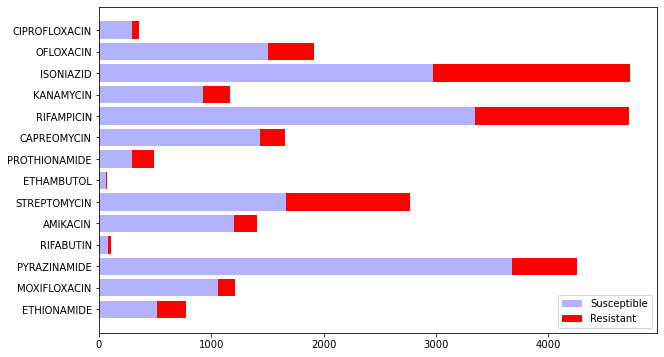

In [40]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.barh(keys, values[:,0],  color='b', alpha=0.3,label='Susceptible')
plt.barh(keys, values[:,1], color='r' ,left= values[:,0],label='Resistant')
plt.legend(loc='lower right')
plt.savefig("./drug.png", bbox_inches='tight',dpi=300)
plt.show()

In [41]:
msf_RS = pd.read_csv("../1_data/pff_msf_genenu.csv")

In [68]:
msf_RS[msf_RS.ISOLATID == 'SRR2099974']

,ISOLATID,GENENAME,NUCHANGE,MSDRUG,label,GENE_NU
0,SRR2099974,gidB,615A>G,ETHAMBUTOL,1,gidB_615A>G
1,SRR2099974,gidB,615A>G,RIFAMPICIN,1,gidB_615A>G
2,SRR2099974,gidB,615A>G,PYRAZINAMIDE,0,gidB_615A>G
3,SRR2099974,gidB,615A>G,ISONIAZID,1,gidB_615A>G
4,SRR2099974,gidB,223C>T,ETHAMBUTOL,1,gidB_223C>T
...,...,...,...,...,...,...
6787,SRR2099974,yrbE4A,753C>A,ISONIAZID,1,yrbE4A_753C>A
6788,SRR2099974,zur,191A>G,ETHAMBUTOL,1,zur_191A>G
6789,SRR2099974,zur,191A>G,RIFAMPICIN,1,zur_191A>G
6790,SRR2099974,zur,191A>G,PYRAZINAMIDE,0,zur_191A>G


In [70]:
co_drug_list =[]
for i, group in msf_RS.groupby("ISOLATID"):
    ls = list(set(group['MSDRUG'].values))
    co_drug_list.append(ls)
co_drug_list   

[['RIFAMPICIN', 'ETHAMBUTOL', 'ISONIAZID', 'PYRAZINAMIDE'],
 ['ETHIONAMIDE',
  'MOXIFLOXACIN',
  'PYRAZINAMIDE',
  'ETHAMBUTOL',
  'LEVOFLOXACIN',
  'RIFAMPICIN',
  'ISONIAZID',
  'OFLOXACIN'],
 ['ETHIONAMIDE',
  'MOXIFLOXACIN',
  'PYRAZINAMIDE',
  'ETHAMBUTOL',
  'LEVOFLOXACIN',
  'RIFAMPICIN',
  'ISONIAZID',
  'OFLOXACIN'],
 ['ETHIONAMIDE',
  'MOXIFLOXACIN',
  'PYRAZINAMIDE',
  'ETHAMBUTOL',
  'LEVOFLOXACIN',
  'RIFAMPICIN',
  'ISONIAZID',
  'OFLOXACIN'],
 ['ETHIONAMIDE',
  'MOXIFLOXACIN',
  'PYRAZINAMIDE',
  'ETHAMBUTOL',
  'LEVOFLOXACIN',
  'RIFAMPICIN',
  'ISONIAZID',
  'OFLOXACIN'],
 ['ETHIONAMIDE',
  'MOXIFLOXACIN',
  'PYRAZINAMIDE',
  'ETHAMBUTOL',
  'LEVOFLOXACIN',
  'RIFAMPICIN',
  'ISONIAZID',
  'OFLOXACIN'],
 ['ETHIONAMIDE',
  'MOXIFLOXACIN',
  'PYRAZINAMIDE',
  'ETHAMBUTOL',
  'LEVOFLOXACIN',
  'RIFAMPICIN',
  'ISONIAZID',
  'OFLOXACIN'],
 ['ETHIONAMIDE',
  'MOXIFLOXACIN',
  'PYRAZINAMIDE',
  'ETHAMBUTOL',
  'LEVOFLOXACIN',
  'RIFAMPICIN',
  'ISONIAZID',
  'OFLOXACIN'],
 [

In [46]:
import seaborn as sns
sns.set()

In [47]:
def generate_matrix(au_group, matrix):
    for key, value in au_group.items():
        A = key.split(',')[0]
        B = key.split(',')[1]
#         print(A)
#         print(B)
        Fi = au_dict[A]
        Fj = au_dict[B]
        Eij = value*value/(Fi*Fj)
        #按照作者进行索引，更新矩阵
        matrix.loc[A, B] = Eij
        matrix.loc[B, A] = Eij
    return matrix

In [71]:
def authors_stat(co_authors_list):
    au_dict = {}  # 单个作者频次统计
    au_group = {}  # 两两作者合作
    for authors in co_authors_list:
        authors_co = authors  # 合作者同样构建一个样本
        for au in authors:
            # 统计单个作者出现的频次
            if au not in au_dict:
                au_dict[au] = 1
            else:
                au_dict[au] += 1
            # 统计合作的频次
            authors_co = authors_co[1:]  # 去掉当前作者
            for au_c in authors_co:
                A, B = au, au_c  # 不能用本来的名字，否则会改变au自身
                if A > B:
                    A, B = B, A  # 保持两个作者名字顺序一致
                co_au = A + ',' + B  # 将两个作者合并起来，依然以逗号隔开
                if co_au not in au_group:
                    au_group[co_au] = 1
                else:
                    au_group[co_au] += 1
    return au_group, au_dict

In [72]:
au_group, au_dict = authors_stat(co_drug_list)

In [73]:

au_list = list(au_dict.keys())  # 取出所有单个作者

In [74]:
matrix = pd.DataFrame(np.identity(len(au_list)), columns=au_list, index=au_list)
matrix

,RIFAMPICIN,ETHAMBUTOL,ISONIAZID,PYRAZINAMIDE,ETHIONAMIDE,MOXIFLOXACIN,LEVOFLOXACIN,OFLOXACIN,AMIKACIN,CAPREOMYCIN,KANAMYCIN,CYCLOSERINE,RIFABUTIN,PARA-AMINOSALICYLIC ACID,STREPTOMYCIN,CIPROFLOXACIN,PROTHIONAMIDE
RIFAMPICIN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ETHAMBUTOL,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ISONIAZID,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PYRAZINAMIDE,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ETHIONAMIDE,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MOXIFLOXACIN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LEVOFLOXACIN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OFLOXACIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AMIKACIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAPREOMYCIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


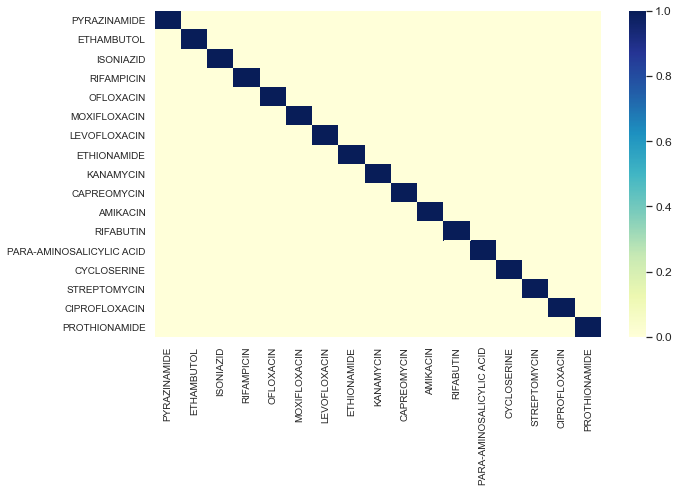

In [52]:
# fig, ax = plt.subplots(figsize=(12,9))
fig = plt.figure(figsize=(10,6))
# cmap='RdBu_r' 颜色主题风格   xticklabels 代表步长
sns_plot = sns.heatmap(matrix, cmap='YlGnBu')
sns_plot.tick_params(labelsize=10) # heatmap 刻度字体大小
# colorbar 刻度线设置
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=12) # colorbar 刻度字体大小
# fig.savefig("heatmap.pdf", bbox_inches='tight')
plt.savefig("./con-matrx.png", bbox_inches='tight',dpi=300)
plt.show()

In [55]:
matrix = matrix.drop(columns=['PARA-AMINOSALICYLIC ACID', 'LEVOFLOXACIN', 'IMIPENEM'])

In [57]:
matrix = matrix.drop(index=['PARA-AMINOSALICYLIC ACID', 'LEVOFLOXACIN', 'IMIPENEM'])

In [58]:
au_group

{'ETHAMBUTOL,PYRAZINAMIDE': 4498057483,
 'ISONIAZID,PYRAZINAMIDE': 4468092262,
 'PYRAZINAMIDE,RIFAMPICIN': 4499683663,
 'PYRAZINAMIDE,PYRAZINAMIDE': 2271685942,
 'ETHAMBUTOL,ISONIAZID': 5103500203,
 'ETHAMBUTOL,RIFAMPICIN': 5125118535,
 'ETHAMBUTOL,ETHAMBUTOL': 2580031235,
 'ISONIAZID,RIFAMPICIN': 5088634754,
 'ISONIAZID,ISONIAZID': 2566084241,
 'RIFAMPICIN,RIFAMPICIN': 2572477795,
 'OFLOXACIN,RIFAMPICIN': 1875199162,
 'MOXIFLOXACIN,RIFAMPICIN': 1017989098,
 'LEVOFLOXACIN,RIFAMPICIN': 255900461,
 'ETHIONAMIDE,RIFAMPICIN': 875368792,
 'ISONIAZID,OFLOXACIN': 1873904943,
 'OFLOXACIN,PYRAZINAMIDE': 1380174742,
 'MOXIFLOXACIN,OFLOXACIN': 1094872671,
 'ETHAMBUTOL,OFLOXACIN': 1892223920,
 'LEVOFLOXACIN,OFLOXACIN': 301185315,
 'ETHIONAMIDE,OFLOXACIN': 865151435,
 'OFLOXACIN,OFLOXACIN': 986132114,
 'ISONIAZID,MOXIFLOXACIN': 1041681701,
 'ISONIAZID,LEVOFLOXACIN': 260248491,
 'ETHIONAMIDE,ISONIAZID': 847793451,
 'MOXIFLOXACIN,PYRAZINAMIDE': 1016781466,
 'LEVOFLOXACIN,PYRAZINAMIDE': 245200438,
 'E

In [75]:
def generate_matrix(au_group, matrix):
    for key, value in au_group.items():
        A = key.split(',')[0]
        B = key.split(',')[1]
#         print(A)
#         print(B)
        Fi = au_dict[A]
        Fj = au_dict[B]
        Eij = value*value/(Fi*Fj)
        #按照作者进行索引，更新矩阵
        matrix.loc[A, B] = Eij
        matrix.loc[B, A] = Eij
    return matrix

In [76]:
matrix =  generate_matrix(au_group, matrix)
matrix

,RIFAMPICIN,ETHAMBUTOL,ISONIAZID,PYRAZINAMIDE,ETHIONAMIDE,MOXIFLOXACIN,LEVOFLOXACIN,OFLOXACIN,AMIKACIN,CAPREOMYCIN,KANAMYCIN,CYCLOSERINE,RIFABUTIN,PARA-AMINOSALICYLIC ACID,STREPTOMYCIN,CIPROFLOXACIN,PROTHIONAMIDE
RIFAMPICIN,1.000000,0.983571,0.977684,0.885613,0.158399,0.220364,0.055992,0.362602,0.269245,0.317460,0.214417,0.054268,0.022467,0.089762,0.575088,0.075034,0.104917
ETHAMBUTOL,0.983571,1.000000,0.981490,0.880155,0.154506,0.232618,0.058278,0.369655,0.267418,0.316254,0.214388,0.047588,0.017229,0.084191,0.578771,0.073494,0.104519
ISONIAZID,0.977684,0.981490,1.000000,0.874539,0.150290,0.232206,0.056939,0.367052,0.265465,0.314778,0.213570,0.045727,0.013746,0.082361,0.574290,0.073202,0.104273
PYRAZINAMIDE,0.885613,0.880155,0.874539,1.000000,0.087060,0.243645,0.056745,0.263940,0.226730,0.209814,0.125031,0.023268,0.020024,0.029408,0.434509,0.080935,0.088258
ETHIONAMIDE,0.158399,0.154506,0.150290,0.087060,1.000000,0.083563,0.303608,0.389228,0.129354,0.202906,0.314577,0.326137,0.128479,0.256742,0.097741,0.010847,0.000000
MOXIFLOXACIN,0.220364,0.232618,0.232206,0.243645,0.083563,1.000000,0.231784,0.628209,0.557442,0.447537,0.235804,0.000013,0.000008,0.000007,0.206242,0.008016,0.245582
LEVOFLOXACIN,0.055992,0.058278,0.056939,0.056745,0.303608,0.231784,1.000000,0.175081,0.041302,0.023060,0.030478,0.000010,0.000000,0.000374,0.000804,0.000000,0.003896
OFLOXACIN,0.362602,0.369655,0.367052,0.263940,0.389228,0.628209,0.175081,1.000000,0.689429,0.817322,0.598488,0.126570,0.051254,0.225205,0.415054,0.018625,0.237019
AMIKACIN,0.269245,0.267418,0.265465,0.226730,0.129354,0.557442,0.041302,0.689429,1.000000,0.789820,0.452382,0.178288,0.068593,0.147329,0.382145,0.026790,0.349970
CAPREOMYCIN,0.317460,0.316254,0.314778,0.209814,0.202906,0.447537,0.023060,0.817322,0.789820,1.000000,0.644313,0.154984,0.062960,0.261058,0.484381,0.022362,0.297220


In [77]:
matrix = matrix.drop(columns=['PARA-AMINOSALICYLIC ACID', 'LEVOFLOXACIN', 'CYCLOSERINE'])
matrix = matrix.drop(index=['PARA-AMINOSALICYLIC ACID', 'LEVOFLOXACIN', 'CYCLOSERINE'])

In [78]:
au_dict

{'RIFAMPICIN': 4718,
 'ETHAMBUTOL': 4736,
 'ISONIAZID': 4728,
 'PYRAZINAMIDE': 4252,
 'ETHIONAMIDE': 779,
 'MOXIFLOXACIN': 1213,
 'LEVOFLOXACIN': 378,
 'OFLOXACIN': 1915,
 'AMIKACIN': 1403,
 'CAPREOMYCIN': 1652,
 'KANAMYCIN': 1168,
 'CYCLOSERINE': 262,
 'RIFABUTIN': 106,
 'PARA-AMINOSALICYLIC ACID': 453,
 'STREPTOMYCIN': 2767,
 'CIPROFLOXACIN': 358,
 'PROTHIONAMIDE': 495}

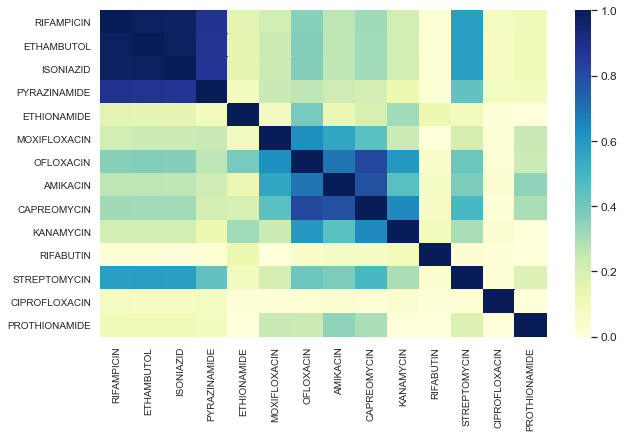

In [79]:
# fig, ax = plt.subplots(figsize=(12,9))
fig = plt.figure(figsize=(10,6))
# cmap='RdBu_r' 颜色主题风格   xticklabels 代表步长
sns_plot = sns.heatmap(matrix, cmap='YlGnBu')
sns_plot.tick_params(labelsize=10) # heatmap 刻度字体大小
# colorbar 刻度线设置
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=12) # colorbar 刻度字体大小
# fig.savefig("heatmap.pdf", bbox_inches='tight')
plt.savefig("./con-matrx.png", bbox_inches='tight',dpi=300)
plt.show()